A Python-based financial analysis using a discounted cash flow (DCF) model with sensitivity analysis and visualizations, we'll simulate a CCS project scenario based on the elements discussed in the summary. Here's what the process will include:

Set Up the DCF Model:
Calculate cash flows: inflows (revenues from CO₂ credits, potential EOR income) and outflows (CAPEX, OPEX).
Use a discount rate to compute the Net Present Value (NPV) and Internal Rate of Return (IRR).

Perform Sensitivity Analysis:
Vary key input parameters like CAPEX, OPEX, CO₂ credit prices, and the discount rate to observe their effect on NPV.

Visualize the Results:
Use plots to visualize the NPV distribution and sensitivity analysis.
Include a Monte Carlo simulation to assess project risks with a probabilistic approach.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Constants and assumptions for the analysis
years = 10  # Project lifetime in years
initial_investment = 5000000  # Initial investment (CAPEX) in dollars
annual_opex = 500000  # Annual operational expenditure in dollars
annual_revenue_from_co2_credits = 800000  # Revenue from CO2 credits in dollars
annual_revenue_from_eor = 400000  # Revenue from Enhanced Oil Recovery (EOR) in dollars
discount_rate = 0.1  # Discount rate (WACC)

In [3]:
# Generate cash flows over the project lifetime
cash_flows = np.array([
    -initial_investment
] + [
    annual_revenue_from_co2_credits + annual_revenue_from_eor - annual_opex for _ in range(1, years + 1)
])


In [4]:
# Discounted Cash Flow (DCF) calculation for NPV
def calculate_npv(cash_flows, discount_rate):
    return np.sum([cf / (1 + discount_rate) ** t for t, cf in enumerate(cash_flows)])

In [5]:
# Calculate NPV
npv = calculate_npv(cash_flows, discount_rate)

In [6]:
# Sensitivity Analysis: Vary CAPEX, OPEX, CO2 price, and discount rate
capex_variation = np.linspace(0.8 * initial_investment, 1.2 * initial_investment, 5)
opex_variation = np.linspace(0.8 * annual_opex, 1.2 * annual_opex, 5)
co2_price_variation = np.linspace(0.8 * annual_revenue_from_co2_credits, 1.2 * annual_revenue_from_co2_credits, 5)
discount_rate_variation = np.linspace(0.08, 0.12, 5)

In [7]:
# Store sensitivity analysis results
sensitivity_results = []

for capex in capex_variation:
    for opex in opex_variation:
        for co2_price in co2_price_variation:
            for discount in discount_rate_variation:
                cash_flows_sens = np.array(
                    [-capex] + [co2_price + annual_revenue_from_eor - opex for _ in range(1, years + 1)]
                )
                npv_sens = calculate_npv(cash_flows_sens, discount)
                sensitivity_results.append([capex, opex, co2_price, discount, npv_sens])

In [8]:
# Create a DataFrame for the sensitivity results
sensitivity_df = pd.DataFrame(
    sensitivity_results,
    columns=['CAPEX', 'OPEX', 'CO2 Price', 'Discount Rate', 'NPV']
)

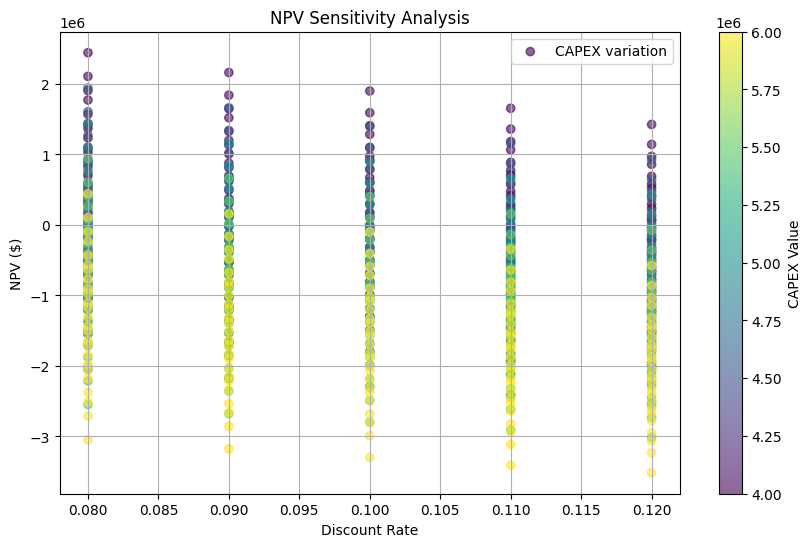

In [9]:
# Visualization: NPV Distribution for Sensitivity Analysis
plt.figure(figsize=(10, 6))
plt.scatter(sensitivity_df['Discount Rate'], sensitivity_df['NPV'], alpha=0.6, c=sensitivity_df['CAPEX'], cmap='viridis', label='CAPEX variation')
plt.colorbar(label='CAPEX Value')
plt.title('NPV Sensitivity Analysis')
plt.xlabel('Discount Rate')
plt.ylabel('NPV ($)')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# Monte Carlo Simulation for NPV estimation
iterations = 1000
npv_simulation = []

In [11]:
# Assume a normal distribution for CO2 credits, EOR revenue, and OPEX with standard deviations of 10%
co2_credits_dist = norm(loc=annual_revenue_from_co2_credits, scale=0.1 * annual_revenue_from_co2_credits)
eor_revenue_dist = norm(loc=annual_revenue_from_eor, scale=0.1 * annual_revenue_from_eor)
opex_dist = norm(loc=annual_opex, scale=0.1 * annual_opex)

In [12]:
for _ in range(iterations):
    co2_credits_sim = co2_credits_dist.rvs(size=years)
    eor_revenue_sim = eor_revenue_dist.rvs(size=years)
    opex_sim = opex_dist.rvs(size=years)
    cash_flows_sim = np.array([-initial_investment] + [co2_credits_sim[i] + eor_revenue_sim[i] - opex_sim[i] for i in range(years)])
    npv_simulation.append(calculate_npv(cash_flows_sim, discount_rate))

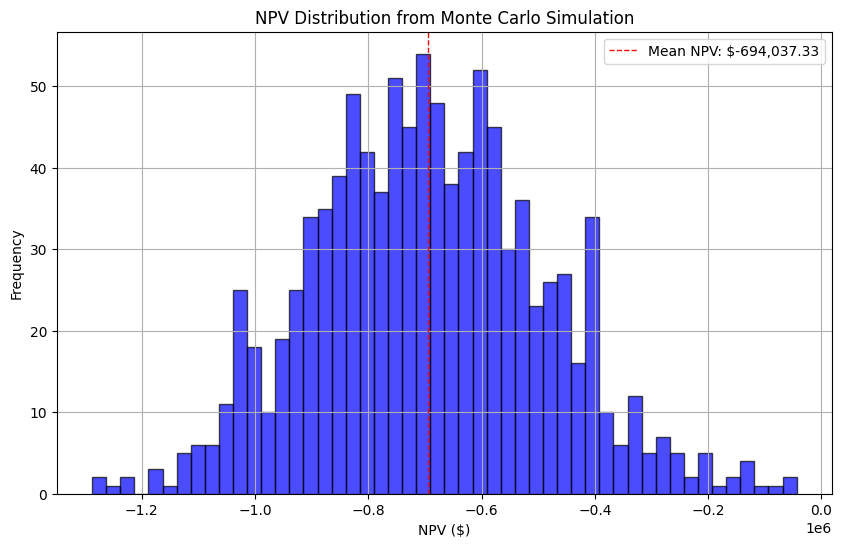

In [13]:
# Plot the Monte Carlo simulation results
plt.figure(figsize=(10, 6))
plt.hist(npv_simulation, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('NPV Distribution from Monte Carlo Simulation')
plt.xlabel('NPV ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(np.mean(npv_simulation), color='red', linestyle='dashed', linewidth=1, label=f'Mean NPV: ${np.mean(npv_simulation):,.2f}')
plt.legend()
plt.show()

In [16]:
# Display the sensitivity analysis data to the user
display(sensitivity_df)
sensitivity_df.to_csv('sensitivity_analysis_results.csv', index=False)

,CAPEX,OPEX,CO2 Price,Discount Rate,NPV
0,4000000.0,400000.0,640000.0,0.08,2.944521e+05
1,4000000.0,400000.0,640000.0,0.09,1.073009e+05
2,4000000.0,400000.0,640000.0,0.10,-6.747705e+04
3,4000000.0,400000.0,640000.0,0.11,-2.308915e+05
4,4000000.0,400000.0,640000.0,0.12,-3.838573e+05
...,...,...,...,...,...
620,6000000.0,600000.0,960000.0,0.08,-9.003381e+05
621,6000000.0,600000.0,960000.0,0.09,-1.122580e+06
622,6000000.0,600000.0,960000.0,0.10,-1.330129e+06
623,6000000.0,600000.0,960000.0,0.11,-1.524184e+06
